In [1]:
import numpy as np

def sample_data(shape=(73, 145)):
    nlats, nlons = shape
    lats = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons = np.linspace(0, 2 * np.pi, nlons)
    lons, lats = np.meshgrid(lons, lats)
    wave = 0.75 * (np.sin(2 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats = np.rad2deg(lats)
    lons = np.rad2deg(lons)
    data = wave + mean

    return lons, lats, data

lon, lat, data = sample_data(shape=(73, 145))
lon -= 180

In [2]:
%matplotlib inline
import matplotlib

cm = matplotlib.cm.get_cmap("cubehelix")

normed_data = (data - data.min()) / (data.max() - data.min())
colored_data = cm(normed_data)

# Bad


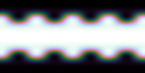

In [3]:
import folium

m1 = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    opacity=0.25,
).add_to(m1)

m1

# Good


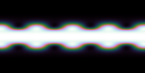

In [4]:
m2 = folium.Map(location=[lat.mean(), lon.mean()], zoom_start=1)

folium.raster_layers.ImageOverlay(
    image=colored_data,
    bounds=[[lat.min(), lon.min()], [lat.max(), lon.max()]],
    mercator_project=True,
    opacity=0.25,
).add_to(m2)

m2